# Prédire le comportement d'achat des clients

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df[['sales_channel', 'trip_type']]

,sales_channel,trip_type
0,Internet,RoundTrip
1,Internet,RoundTrip
2,Internet,RoundTrip
3,Internet,RoundTrip
4,Internet,RoundTrip
...,...,...
49995,Internet,RoundTrip
49996,Internet,RoundTrip
49997,Internet,RoundTrip
49998,Internet,RoundTrip


In [5]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [6]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [7]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [9]:
# 2. Transformation des variables catégorielles
# Nous transformons le canal de vente et le type de voyage
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type'], drop_first=True)

In [13]:
# 3. Mapping du jour de la semaine (Sat -> 6, Wed -> 3, etc.)
mapping = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}
df['flight_day'] = df['flight_day'].map(mapping)

In [17]:
# 4. Suppression des colonnes textuelles trop complexes (route, booking_origin) pour ce premier modèle
X = df.drop(['booking_complete', 'route', 'booking_origin'], axis=1)
y = df['booking_complete']

# Phase 2 : Modélisation et Validation Croisée

Le projet demande d'utiliser RandomForest et d'effectuer une validation croisée. Cela permet de s'assurer que le modèle est stable sur différentes parties du dataset

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [20]:
# Création du modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [21]:
# Validation croisée (on divise en 5 et on calcule la précision)
scores = cross_val_score(rf, X, y, cv=5)
print(f"Précision moyenne par validation croisée : {scores.mean():.2f}")

Précision moyenne par validation croisée : 0.68


In [22]:
# Entraînement final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

# Phase 3 : Visualisation pour le Responsable

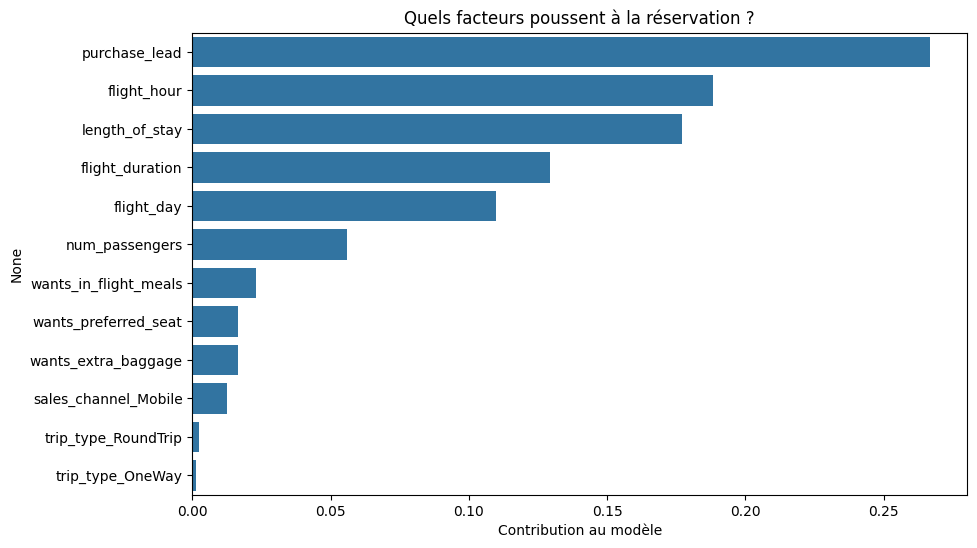

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Quels facteurs poussent à la réservation ?")
plt.xlabel("Contribution au modèle")
plt.show()

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  int64  
 5   wants_extra_baggage    50000 non-null  int64  
 6   wants_preferred_seat   50000 non-null  int64  
 7   wants_in_flight_meals  50000 non-null  int64  
 8   flight_duration        50000 non-null  float64
 9   sales_channel_Mobile   50000 non-null  bool   
 10  trip_type_OneWay       50000 non-null  bool   
 11  trip_type_RoundTrip    50000 non-null  bool   
dtypes: bool(3), float64(1), int64(8)
memory usage: 3.6 MB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  object 
 5   route                  50000 non-null  object 
 6   booking_origin         50000 non-null  object 
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
 12  sales_channel_Mobile   50000 non-null  bool   
 13  trip_type_OneWay       50000 non-null  bool   
 14  trip_type_RoundTrip    50000 non-null  bool   
dtypes: